In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0 : print('Available GPUs: {}'.format(gpus))
else             : print('!!! No GPUs found !!!')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [18]:
np.random.seed(42)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [20]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 12ms/step - loss: 0.1424
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0579
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0582
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0586
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0494
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0412
Epoch 8/20
2/2 [==============================] - 0s 11ms/step - loss: 0.0308
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0222
Epoch 10/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 

2021-12-30 14:17:50.784585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 15/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 16/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 17/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 18/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 19/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 20/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0047


In [21]:
codings = encoder.predict(X_train)

2021-12-30 14:17:55.349650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Saving figure linear_autoencoder_pca_plot


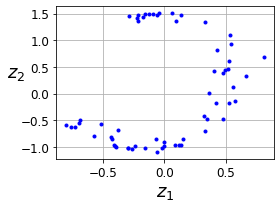

In [22]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

In [25]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [26]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20


2021-12-30 14:18:18.679357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1718/1719 [============================>.] - ETA: 0s - loss: 0.3364 - rounded_accuracy: 0.8886

2021-12-30 14:18:37.983688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 21s 12ms/step - loss: 0.3364 - rounded_accuracy: 0.8887 - val_loss: 0.3163 - val_rounded_accuracy: 0.9004
Epoch 2/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3054 - rounded_accuracy: 0.9153 - val_loss: 0.3048 - val_rounded_accuracy: 0.9193
Epoch 3/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2986 - rounded_accuracy: 0.9213 - val_loss: 0.2983 - val_rounded_accuracy: 0.9247
Epoch 4/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2944 - rounded_accuracy: 0.9252 - val_loss: 0.2939 - val_rounded_accuracy: 0.9261
Epoch 5/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2917 - rounded_accuracy: 0.9277 - val_loss: 0.2920 - val_rounded_accuracy: 0.9280
Epoch 6/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2899 - rounded_accuracy: 0.9293 - val_loss: 0.2904 - val_rounded_accuracy: 0.9313
Epoch 7/20
1719/1719 [=================

In [ ]:
1